In [1]:
# Import Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Inspect Measurement and return columns
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
# Find last data point
last_date = session.query(Measurement.prcp, Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)


# Perform a query to retrieve the data and precipitation scores
last_twelve_months = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <='2017.08-23')

for month in last_twelve_months:
    print (month)


(0.0, '2017-08-23')
(0.0, '2016-08-23')
(0.08, '2016-08-24')
(0.08, '2016-08-25')
(0.0, '2016-08-26')
(0.0, '2016-08-27')
(0.01, '2016-08-28')
(0.0, '2016-08-29')
(0.0, '2016-08-30')
(0.13, '2016-08-31')
(0.0, '2016-09-01')
(0.0, '2016-09-02')
(0.0, '2016-09-03')
(0.03, '2016-09-04')
(None, '2016-09-05')
(None, '2016-09-06')
(0.05, '2016-09-07')
(0.0, '2016-09-08')
(0.03, '2016-09-09')
(0.0, '2016-09-10')
(0.05, '2016-09-11')
(0.0, '2016-09-12')
(0.02, '2016-09-13')
(1.32, '2016-09-14')
(0.42, '2016-09-15')
(0.06, '2016-09-16')
(0.05, '2016-09-17')
(0.0, '2016-09-18')
(0.0, '2016-09-19')
(0.0, '2016-09-20')
(0.0, '2016-09-21')
(0.02, '2016-09-22')
(0.0, '2016-09-23')
(0.0, '2016-09-24')
(0.0, '2016-09-25')
(0.06, '2016-09-26')
(0.02, '2016-09-27')
(0.0, '2016-09-28')
(0.0, '2016-09-29')
(0.0, '2016-09-30')
(0.0, '2016-10-01')
(0.0, '2016-10-02')
(0.0, '2016-10-03')
(0.0, '2016-10-04')
(0.0, '2016-10-05')
(0.0, '2016-10-06')
(0.0, '2016-10-07')
(0.0, '2016-10-08')
(0.0, '2016-10-09')
(0

(0.05, '2017-04-24')
(0.0, '2017-04-25')
(0.22, '2017-04-26')
(0.11, '2017-04-27')
(0.79, '2017-04-28')
(0.0, '2017-04-29')
(0.8, '2017-04-30')
(0.25, '2017-05-01')
(0.0, '2017-05-02')
(None, '2017-05-04')
(0.1, '2017-05-05')
(0.0, '2017-05-06')
(0.03, '2017-05-07')
(1.11, '2017-05-08')
(0.23, '2017-05-09')
(0.55, '2017-05-10')
(0.44, '2017-05-11')
(0.1, '2017-05-12')
(0.1, '2017-05-13')
(1.0, '2017-05-14')
(0.6, '2017-05-15')
(0.3, '2017-05-16')
(0.06, '2017-05-17')
(0.0, '2017-05-18')
(None, '2017-05-20')
(0.0, '2017-05-21')
(0.3, '2017-05-22')
(0.44, '2017-05-23')
(2.17, '2017-05-24')
(0.88, '2017-05-25')
(0.0, '2017-05-26')
(0.5, '2017-05-27')
(0.0, '2017-05-28')
(None, '2017-05-30')
(0.01, '2017-06-01')
(None, '2017-06-03')
(0.82, '2017-06-04')
(0.01, '2017-06-05')
(0.0, '2017-06-06')
(0.01, '2017-06-07')
(0.0, '2017-06-08')
(None, '2017-06-10')
(0.7, '2017-06-11')
(0.81, '2017-06-12')
(0.65, '2017-06-13')
(0.81, '2017-06-14')
(1.69, '2017-06-15')
(0.1, '2017-06-16')
(0.1, '2017-0

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
year_totals = pd.DataFrame(last_twelve_months, columns=['prcp', 'date'])
year_totals['date']=pd.to_datetime(year_totals['date'], format='%Y%m%d', errors='ignore')
year_totals.set_index('date', inplace=True, )
year_totals.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


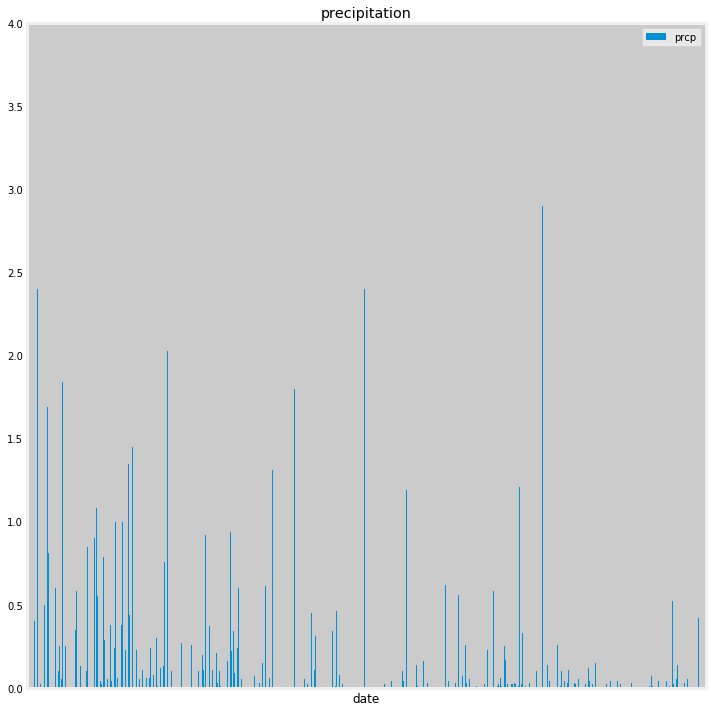

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
year_totals.iloc[::-1].plot.bar(title="precipitation", figsize=(10,10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.grid(True)

plt.ylim(0, 4)
plt.tight_layout()

plt.savefig('precipitation.png')
plt.show()

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_totals.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).count()
stations

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_query = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for row in station_query:
    print(row)
    
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

print(most_active)

one_station = most_active[0]
print (one_station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
('USC00519281', 2772)
USC00519281


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
  
# Select column to query, with aggregate functions
sel =  [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)] 

# Query for most acitve station's results
station_tobs = session.query(*sel).filter((Measurement.station)==one_station).all()


print(station_tobs)


[(54.0, 85.0, 71.66378066378067)]


In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

end_date = dt.datetime(2017, 8, 23)
start_date = dt.datetime(2016, 8, 23)

one_station_tobs = session.query(Measurement.date, Measurement.tobs).filter((Measurement.station)==one_station).\
    filter((Measurement.date)>= start_date).filter((Measurement.date) <= end_date).all()

# Preview results
#for tobs in one_station_tobs:
#    print(tobs)



In [19]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
df = pd.DataFrame(one_station_tobs, columns=['date', 'tobs'])
df.set_index('date', inplace=True, )
df.head(10)

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0
2016-09-01,80.0


[[<matplotlib.axes._subplots.AxesSubplot object at 0x122dd4198>]]


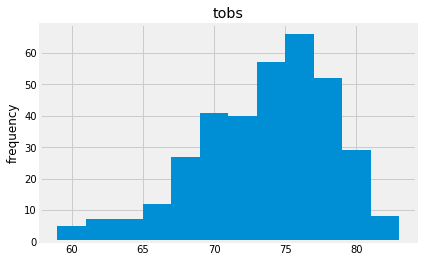

In [20]:
ax = df.hist(bins=12)
plt.ylabel('frequency')
plt.title='tobs'

plt.savefig('station_histogram.png')

print(ax)


![precipitation](Images/station-histogram.png)

# Temperature Analysis I (Bonus)

* Use either SQLAlchemy or pandas's read_csv() 
* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.
* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?


In [21]:
# Create queries for temperatures based on imported sqlite database

jun_results = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.station).filter(func.strftime("%m", Measurement.date) == "06").all()

dec_results = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.station).filter(func.strftime("%m", Measurement.date) == "12").all()

In [22]:
# Load results into DataFrame, find mean of tobs columns
june_temps = pd.DataFrame(jun_results, columns=['station','date', 'prcp', 'tobs'])

#preview
#june_temps.head()

jun_av = june_temps['tobs'].mean()

print(jun_av)

dec_temps = pd.DataFrame(dec_results, columns=['station','date', 'prcp', 'tobs'])

#preview
#dec_temps.head()
dec_av = dec_temps['tobs'].mean()

print(dec_av)

74.94411764705882
71.04152933421226


In [23]:
# Use an unpaired ttest because the two samples are distinct (June, December)
# P value is 4.19, no significant difference exists.
from scipy.stats import ttest_ind

ttest = ttest_ind(june_temps.loc[:,'tobs'], dec_temps.loc[:,'tobs'], equal_var=False)

print(ttest)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)


# Temperature Analysis II (Bonus)

* The starter notebook contains a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

* Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

* Plot the min, avg, and max temperature from your previous query as a bar chart.

* Use the average temperature as the bar height.

* Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

* Trip Dates: 07-24-2017 to 07-31-2017


In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()




In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
last_year_temps = (calc_temps('2016-07-24', '2016-07-31'))
print(last_year_temps)


[(74.0, 78.29787234042553, 83.0)]


In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_av_temps= pd.DataFrame({'TMin':[74.0], 'TAvg':[78.29787234042553], 'TMax': [83.0]})

trip_av_temps


                        

,TMin,TAvg,TMax
0,74.0,78.297872,83.0


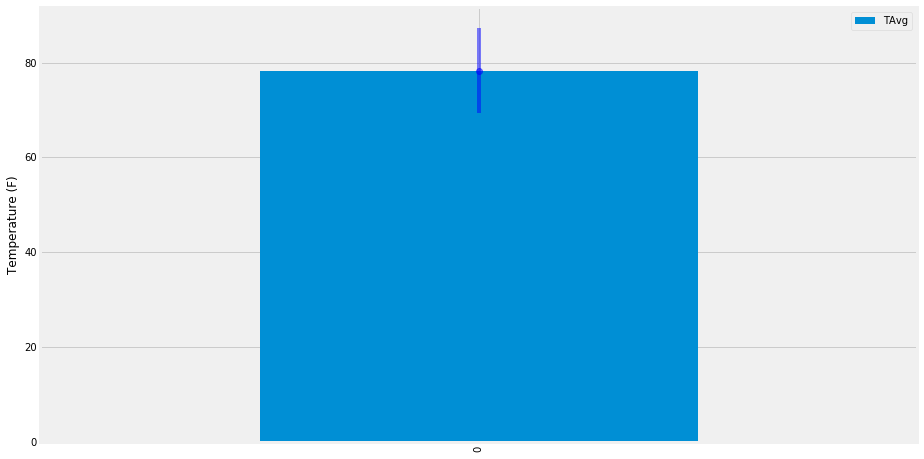

In [34]:
axes = trip_av_temps["TAvg"].plot.bar(legend=True, figsize = (14, 8))
axes.errorbar(0, trip_av_temps["TAvg"], yerr=(trip_av_temps["TMax"] - trip_av_temps["TMin"]), fmt="o", 
    color="b", alpha=0.5)



# Incorporate the other graph properties


plt.ylabel("Temperature (F)")

# Un-commenting this function throws a 'string option is not callable' error
#plt.title("Trip Avg Temp")


# Save the figure
plt.savefig("Resources/TripAvgTemp.png")

# Show plot
plt.show()

In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [32]:
# Plot the daily normals as an area plot with `stacked=False`
